In [2]:
import pandas as pd

# Loading data
sales_df = pd.read_csv("sales_data.csv")
product_df = pd.read_csv("product_info.csv")
customer_df = pd.read_csv("customer_info.csv")

# Check the first few rows of each
print("Sales Data:")
print(sales_df.head())

print("\nProduct Info:")
print(product_df.head())

print("\nCustomer Info:")
print(customer_df.head())

Sales Data:
  order_id customer_id product_id quantity  unit_price order_date  \
0  O966977      C00397      P0022        3       39.25   06-07-25   
1  O696648      C00236      P0023        5       18.92   06-07-25   
2  O202644      C00492      P0011        1       29.68   06-07-25   
3  O501803      C00031      P0003        1       32.76   06-07-25   
4  O322242      C00495      P0016        1       47.62   06-07-25   

  delivery_status payment_method   region  discount_applied  
0       Delivered         PayPal  Central              0.00  
1         DELAYED    credit card    North              0.00  
2       delivered  Bank Transfer    North              0.15  
3      Cancelled     Credit Card  Central              0.20  
4         DELAYED    Credit Card     West              0.20  

Product Info:
  product_id             product_name       category launch_date  base_price  \
0      P0001       Storage Product 39        Storage    11-03-25       15.88   
1      P0002      Cleaning

In [6]:
# CLEANING sales_df 
# Strip and title-case strings for consistency
sales_df['delivery_status'] = sales_df['delivery_status'].str.strip().str.title()
sales_df['payment_method'] = sales_df['payment_method'].str.strip().str.title()
sales_df['region'] = sales_df['region'].str.strip().str.title()

# Convert order_date to datetime
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], errors='coerce', dayfirst=True)

# Fill missing discount_applied with 0.0
sales_df['discount_applied'] = sales_df['discount_applied'].fillna(0.0)

# Drop duplicates based on order_id
sales_df = sales_df.drop_duplicates(subset='order_id')

# Ensure numeric columns are non-negative
sales_df = sales_df[(sales_df['quantity'] >= 0) & 
                    (sales_df['unit_price'] >= 0) & 
                    (sales_df['discount_applied'] >= 0)]

# CLEANING product_df 
product_df['category'] = product_df['category'].str.strip().str.title()
product_df['supplier_code'] = product_df['supplier_code'].str.strip().str.upper()

# Convert launch_date to datetime
product_df['launch_date'] = pd.to_datetime(product_df['launch_date'], errors='coerce', dayfirst=True)

# Fill missing categories or base_price
product_df['category'] = product_df['category'].fillna("Unknown")
product_df['base_price'] = product_df['base_price'].fillna(0.0)

# Drop duplicates based on product_id
product_df = product_df.drop_duplicates(subset='product_id')

# CLEANING customer_df 
customer_df['gender'] = customer_df['gender'].str.strip().str.title()
customer_df['region'] = customer_df['region'].str.strip().str.title()
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].str.strip().str.title()

# Convert signup_date to datetime
customer_df['signup_date'] = pd.to_datetime(customer_df['signup_date'], errors='coerce', dayfirst=True)

# Fill missing loyalty_tier with 'Unknown'
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].fillna("Unknown")

# Drop duplicates based on customer_id
customer_df = customer_df.drop_duplicates(subset='customer_id')

# Check for nulls remaining
missing_sales = sales_df.isnull().sum()
missing_product = product_df.isnull().sum()
missing_customer = customer_df.isnull().sum()

missing_sales, missing_product, missing_customer


(order_id            1
 customer_id         2
 product_id          5
 quantity            0
 unit_price          0
 order_date          3
 delivery_status     3
 payment_method      3
 region              0
 discount_applied    0
 dtype: int64,
 product_id       0
 product_name     0
 category         0
 launch_date      0
 base_price       0
 supplier_code    0
 dtype: int64,
 customer_id     1
 email           6
 signup_date     4
 gender          4
 region          3
 loyalty_tier    0
 dtype: int64)

In [5]:
# Convert quantity, unit_price, discount_applied to numeric
sales_df['quantity'] = pd.to_numeric(sales_df['quantity'], errors='coerce')
sales_df['unit_price'] = pd.to_numeric(sales_df['unit_price'], errors='coerce')
sales_df['discount_applied'] = pd.to_numeric(sales_df['discount_applied'], errors='coerce')

# Drop rows with NaNs in numeric columns after conversion
sales_df = sales_df.dropna(subset=['quantity', 'unit_price', 'discount_applied'])

# Ensure non-negative numeric values
sales_df = sales_df[(sales_df['quantity'] >= 0) & 
                    (sales_df['unit_price'] >= 0) & 
                    (sales_df['discount_applied'] >= 0)]

# Check for nulls again
missing_sales = sales_df.isnull().sum()
missing_product = product_df.isnull().sum()
missing_customer = customer_df.isnull().sum()

missing_sales, missing_product, missing_customer


(order_id            1
 customer_id         2
 product_id          5
 quantity            0
 unit_price          0
 order_date          3
 delivery_status     3
 payment_method      3
 region              0
 discount_applied    0
 dtype: int64,
 product_id       0
 product_name     0
 category         0
 launch_date      0
 base_price       0
 supplier_code    0
 dtype: int64,
 customer_id     3
 email           6
 signup_date     4
 gender          4
 region          3
 loyalty_tier    2
 dtype: int64)

In [7]:
# --- FINAL CLEANUP FOR MERGING ---

# Drop rows in sales_df with missing critical fields
sales_df = sales_df.dropna(subset=[
    'order_id', 'customer_id', 'product_id',
    'order_date', 'delivery_status', 'payment_method'
])

# Drop rows in customer_df missing customer_id or email
customer_df = customer_df.dropna(subset=['customer_id', 'email'])

# Fill other missing customer fields with 'Unknown'
customer_df['gender'] = customer_df['gender'].fillna('Unknown')
customer_df['region'] = customer_df['region'].fillna('Unknown')
customer_df['loyalty_tier'] = customer_df['loyalty_tier'].fillna('Unknown')

# Use placeholder for missing signup_date
customer_df['signup_date'] = customer_df['signup_date'].fillna(pd.Timestamp("1900-01-01"))

# Optional: Check again for nulls
print("Sales Missing:\n", sales_df.isnull().sum())
print("Customer Missing:\n", customer_df.isnull().sum())


Sales Missing:
 order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64
Customer Missing:
 customer_id     0
email           0
signup_date     0
gender          0
region          0
loyalty_tier    0
dtype: int64


In [18]:
# Step 1: Merge sales_data with product_info using product_id
sales_products_df = pd.merge(
    sales_df, product_df,
    how='left',
    on='product_id'
)

# Step 2: Merge the result with customer_info using customer_id
merged_df = pd.merge(
    sales_products_df, customer_df,
    how='left',
    on='customer_id'
)

# Inspect the merged DataFrame
print("Merged Data Info:")
print(merged_df.info())
print("\nFirst 5 rows of merged_df:")
print(merged_df.head())

merged_df = merged_df.rename(columns={'region_x': 'region'})

Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2975 entries, 0 to 2974
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2975 non-null   object        
 1   customer_id       2975 non-null   object        
 2   product_id        2975 non-null   object        
 3   quantity          2975 non-null   float64       
 4   unit_price        2975 non-null   float64       
 5   order_date        2975 non-null   datetime64[ns]
 6   delivery_status   2975 non-null   object        
 7   payment_method    2975 non-null   object        
 8   region_x          2975 non-null   object        
 9   discount_applied  2975 non-null   float64       
 10  product_name      2975 non-null   object        
 11  category          2975 non-null   object        
 12  launch_date       2975 non-null   datetime64[ns]
 13  base_price        2975 non-null   float64       
 14  suppli

In [9]:
import numpy as np

# Revenue calculation
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])

# Order week from order_date (ISO calendar)
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

# Price band using pd.cut
merged_df['price_band'] = pd.cut(
    merged_df['unit_price'],
    bins=[-np.inf, 15, 30, np.inf],
    labels=['Low', 'Medium', 'High']
)

# Days between product launch and order date
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

# Extract domain from email
merged_df['email_domain'] = merged_df['email'].str.extract(r'@(.+)$')

# Mark if delivery was delayed
merged_df['is_late'] = merged_df['delivery_status'] == "Delayed"

# Quick preview
print(merged_df[['revenue', 'order_week', 'price_band', 'days_to_order', 'email_domain', 'is_late']].head())


   revenue  order_week price_band  days_to_order       email_domain  is_late
0  117.750          27       High            275    mills-logan.com    False
1   94.600          27     Medium            169         morgan.com     True
2   25.228          27     Medium            103  walters-smith.com    False
3   26.208          27       High            356          gmail.com    False
4   38.096          27       High            136        hotmail.com     True


In [26]:
import numpy as np

# Revenue calculation
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])

# Order week from order_date (ISO calendar)
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

# Price band
merged_df['price_band'] = pd.cut(
    merged_df['unit_price'],
    bins=[-np.inf, 15, 30, np.inf],
    labels=['Low', 'Medium', 'High']
)

# Days between launch and order
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

# Extract domain
merged_df['email_domain'] = merged_df['email'].str.extract(r'@(.+)$')

# Is late delivery
merged_df['is_late'] = merged_df['delivery_status'] == "Delayed"

In [27]:
merged_df = merged_df.rename(columns={'region_x': 'region'})

# Weekly Revenue Trends by Region
weekly_revenue = merged_df.groupby(['order_week', 'region'])['revenue'].sum().reset_index()
weekly_revenue_pivot = weekly_revenue.pivot(index='order_week', columns='region', values='revenue').fillna(0)
print(weekly_revenue_pivot.head())


region         Central       East       North    Nrth       South        West
order_week                                                                   
27          46930.8315  47627.907  46744.5775  19.512  49560.5725  47473.6065


In [28]:
category_perf = merged_df.groupby('category').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'discount_applied': 'mean'
}).sort_values(by='revenue', ascending=False).reset_index()
print(category_perf.head())


        category     revenue  quantity  discount_applied
0       Cleaning  92869.9310    3561.0          0.085553
1        Storage  46719.0075    1725.0          0.081185
2       Outdoors  40018.6840    1515.0          0.081881
3        Kitchen  33857.1080    1224.0          0.075436
4  Personal Care  24892.2765     900.0          0.087043


In [12]:
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M')
loyalty_behavior = merged_df.groupby(['loyalty_tier', 'signup_month']).agg({
    'order_id': 'count',
    'revenue': 'sum',
    'quantity': 'sum'
}).rename(columns={'order_id': 'order_count'}).reset_index()
print(loyalty_behavior.head())


  loyalty_tier signup_month  order_count    revenue  quantity
0        Brnze      2024-07            8   513.4745      16.0
1        Brnze      2025-04            3   290.0715       8.0
2       Bronze      1900-01           10   856.1455      34.0
3       Bronze      2024-07           42  2907.5825     108.0
4       Bronze      2024-08           46  3831.0110     149.0


In [15]:
# Detect correct region column
region_col = [col for col in merged_df.columns if 'region' in col][0]  # auto-pick

# Use the detected region column
delivery_perf = merged_df.groupby([region_col, 'price_band'])['is_late'].mean().unstack().fillna(0)
print(delivery_perf)


price_band       Low    Medium      High
region_x                                
Central     0.383929  0.391111  0.398467
East        0.410526  0.421277  0.411321
North       0.386792  0.438424  0.361775
Nrth        0.000000  0.000000  0.000000
South       0.329897  0.361386  0.421769
West        0.389610  0.349794  0.379699


In [14]:
payment_pref = merged_df.pivot_table(
    index='loyalty_tier',
    columns='payment_method',
    values='order_id',
    aggfunc='count',
    fill_value=0
)
print(payment_pref)


payment_method  Bank Transfer  Bank Transfr  Credit Card  Paypal
loyalty_tier                                                    
Brnze                       2             0            5       4
Bronze                    171             0          268     155
Gld                         3             0            6       4
Gold                      397             1          827     420
Silver                    189             0          295     159
Sllver                      0             0            6       0
Unknown                     0             0            6       3


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


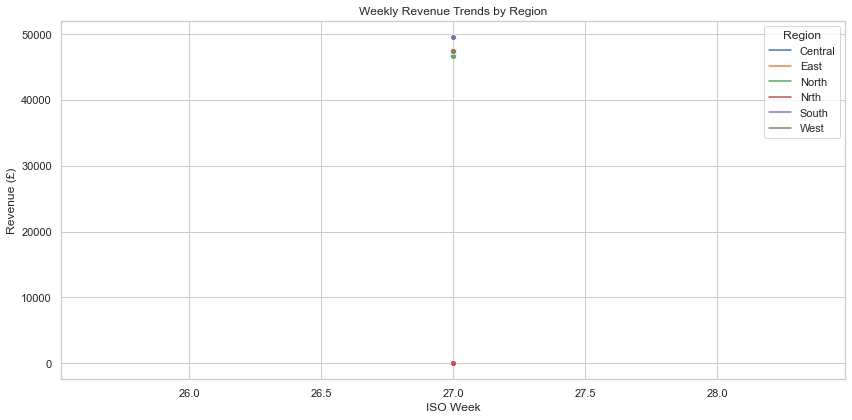

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_revenue, x='order_week', y='revenue', hue='region', marker='o')
plt.title('Weekly Revenue Trends by Region')
plt.xlabel('ISO Week')
plt.ylabel('Revenue (£)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


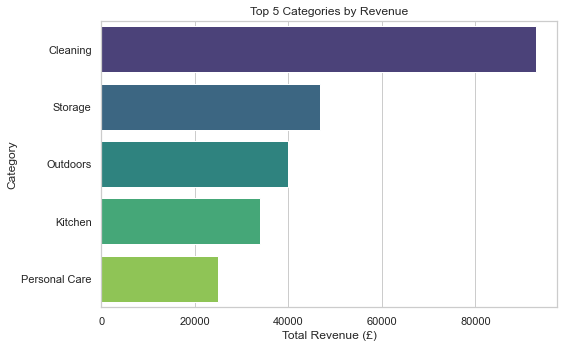

In [31]:
top_categories = category_perf.sort_values('revenue', ascending=False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(data=top_categories, x='revenue', y='category', palette='viridis')
plt.title('Top 5 Categories by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


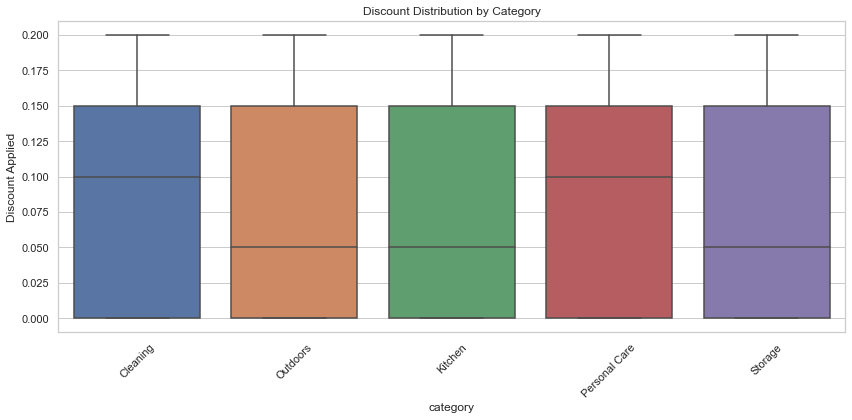

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x='category', y='discount_applied')
plt.title('Discount Distribution by Category')
plt.ylabel('Discount Applied')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


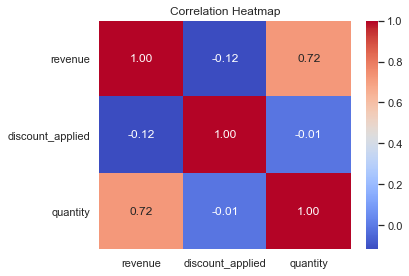

In [33]:
corr_matrix = merged_df[['revenue', 'discount_applied', 'quantity']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


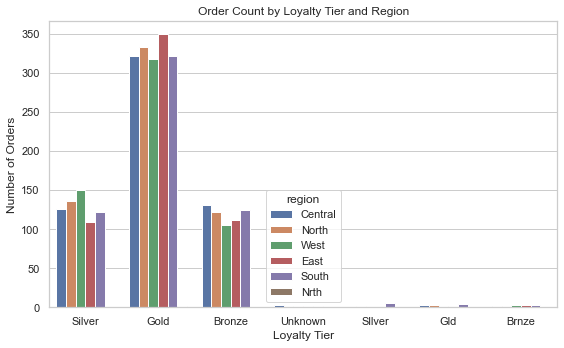

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='loyalty_tier', hue='region')
plt.title('Order Count by Loyalty Tier and Region')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


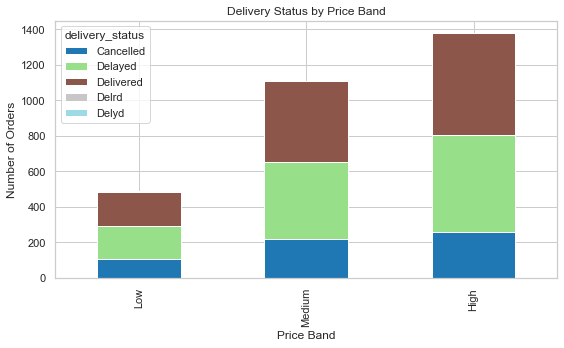

In [35]:
delivery_status_counts = merged_df.groupby(['price_band', 'delivery_status']).size().unstack().fillna(0)
delivery_status_counts.plot(kind='bar', stacked=True, figsize=(8,5), colormap='tab20')
plt.title('Delivery Status by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


In [36]:
category_region_perf = merged_df.groupby(['category', 'region'])['revenue'].sum().reset_index()
top_category_region = category_region_perf.sort_values('revenue', ascending=False).head(10)
print(top_category_region)


    category   region     revenue
1   Cleaning     East  19739.7480
3   Cleaning    South  18887.3650
2   Cleaning    North  18751.7035
4   Cleaning     West  17773.2870
0   Cleaning  Central  17717.8275
25   Storage     West  10014.4465
21   Storage     East   9498.1305
24   Storage    South   9345.3590
13  Outdoors    South   9327.4165
20   Storage  Central   9146.0250


In [37]:
discount_sales = merged_df.groupby(pd.cut(merged_df['discount_applied'], bins=[-0.01, 0, 0.1, 0.25, 0.5, 1]))['quantity'].mean()
print(discount_sales)


discount_applied
(-0.01, 0.0]    2.994944
(0.0, 0.1]      3.034826
(0.1, 0.25]     2.969419
(0.25, 0.5]          NaN
(0.5, 1.0]           NaN
Name: quantity, dtype: float64


In [38]:
loyalty_value = merged_df.groupby('loyalty_tier')['revenue'].sum().sort_values(ascending=False)
print(loyalty_value)


loyalty_tier
Gold       133960.8255
Silver      50639.9190
Bronze      46589.1965
Gld          1084.9690
Brnze         803.5460
Sllver        777.3595
Unknown       767.2730
Name: revenue, dtype: float64


In [39]:
delay_by_region = merged_df.groupby('region')['is_late'].mean().sort_values(ascending=False)
print(delay_by_region)


region
East       0.415126
Central    0.392977
North      0.392027
South      0.386172
West       0.368601
Nrth       0.000000
Name: is_late, dtype: float64


In [40]:
signup_activity = merged_df.groupby(merged_df['signup_date'].dt.to_period('M')).agg({
    'customer_id': 'nunique',
    'revenue': 'sum'
}).rename(columns={'customer_id': 'new_customers'}).reset_index()

print(signup_activity.tail())


   signup_date  new_customers     revenue
9      2025-03             35  18900.7480
10     2025-04             34  15025.5420
11     2025-05             35  15779.2660
12     2025-06             34  17038.6615
13     2025-07              3   1998.1560
